#Scraping TikTok: A Sentiment Analysis of Video Comments

**Script to Scrape TikTok Comments (tiktok_scraper.py)**

In [ ]:
# tiktok_scraper.py
import requests
import json
import time
import pandas as pd

# TikTok video URL (replace with your desired TikTok video URL)
post_url = 'https://www.tiktok.com/@dogsoftiktok/video/7409458850899741995'
post_id = post_url.split('/')[-1]

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'
}

# Function to scrape comments
def fetch_comments(post_id, count=20, max_pages=5):
    comments = []
    cursor = 0
    page = 0

    while page < max_pages:
        url = (
            f'https://www.tiktok.com/api/comment/list/?aweme_id={post_id}'
            f'&count={count}&cursor={cursor}&aid=1988'
        )

        try:
            response = requests.get(url, headers=headers)
            response.raise_for_status()
            data = response.json()

            if 'comments' in data:
                for comment in data['comments']:
                    text = comment.get('text', '')
                    if text:
                        comments.append(text)
                cursor = data.get('cursor', 0)
                if not cursor:
                    break
            else:
                break

            page += 1
            time.sleep(1)

        except requests.exceptions.RequestException as e:
            print(f"Request error: {e}")
            break

    return pd.DataFrame(comments, columns=['comment'])

# Fetch comments and save to CSV
comments_df = fetch_comments(post_id)
comments_df.to_csv(f'{post_id}_comments.csv', index=False)
print(f"Comments saved to {post_id}_comments.csv")
comments_df.head()

Comments saved to 7409458850899741995_comments.csv


,comment
0,"“Oh a toy I don’t have to chase,sweet!”"
1,“Mean ol stopper!”
2,Precious ❤️
3,"Not sure why, but Goldens and Labs are fascina..."
4,My Golden’s did this when they were babies. Th...


 **Sentiment Analysis**

In [ ]:
# sentiment_analysis.py
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

def analyze_sentiment(comment_text):
    sid = SentimentIntensityAnalyzer()
    sentiment = sid.polarity_scores(comment_text)
    return sentiment['compound']

# Load the comments CSV
comments_df = pd.read_csv('7409458850899741995_comments.csv')

# Apply sentiment analysis
comments_df['sentiment_score'] = comments_df['comment'].apply(analyze_sentiment)
comments_df['sentiment'] = comments_df['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')
)

# Save the sentiment data to CSV
comments_df.to_csv('comments_with_sentiment.csv', index=False)
print("Sentiment analysis completed and saved to comments_with_sentiment.csv")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment analysis completed and saved to comments_with_sentiment.csv


In [ ]:
comments_df.head()

,comment,sentiment_score,sentiment
0,"“Oh a toy I don’t have to chase,sweet!”",0.0000,Neutral
1,“Mean ol stopper!”,0.0000,Neutral
2,Precious ❤️,0.5719,Positive
3,"Not sure why, but Goldens and Labs are fascina...",0.4155,Positive
4,My Golden’s did this when they were babies. Th...,0.2942,Positive


**Streamlit Dashboard (dashboard.py)**

In [ ]:
dashboard_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the sentiment data
comments_df = pd.read_csv('comments_with_sentiment.csv')

# Dashboard Title
st.title("TikTok Comment Sentiment Analysis")

# Show data
st.write("### Sample Data")
st.write(comments_df.head(10))

# Sentiment Distribution
st.write("### Sentiment Distribution")
sentiment_counts = comments_df['sentiment'].value_counts()
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
st.pyplot(fig)

# Display most positive and negative comments
st.write("### Most Positive Comments")
st.write(comments_df.nlargest(5, 'sentiment_score')[['comment', 'sentiment_score']])

st.write("### Most Negative Comments")
st.write(comments_df.nsmallest(5, 'sentiment_score')[['comment', 'sentiment_score']])
"""

with open("dashboard.py", "w") as file:
    file.write(dashboard_code)


In [ ]:
!pip install streamlit pyngrok matplotlib


In [ ]:
import os
import threading
import subprocess
from pyngrok import ngrok, conf
import logging

# Set up logging
logging.basicConfig(level=logging.DEBUG)

# Function to run the Streamlit app
def run_streamlit():
    os.system('streamlit run dashboard.py --server.port 8501')

# Start a thread to run the Streamlit app
thread = threading.Thread(target=run_streamlit)
thread.start()

# Set ngrok token if you have one (optional)
# conf.get_default().auth_token = "your_ngrok_token"

# Expose the port 8501 to the public using ngrok
try:
    public_url = ngrok.connect(8501)
    print("Streamlit app is accessible at:", public_url)
except Exception as e:
    logging.error(f"Error connecting to ngrok: {e}")
    logging.error("Please check your ngrok installation and port configuration.")



Streamlit app is accessible at: NgrokTunnel: "https://8010-35-238-147-245.ngrok-free.app" -> "http://localhost:8501"


**How it looks on stream lit application.**

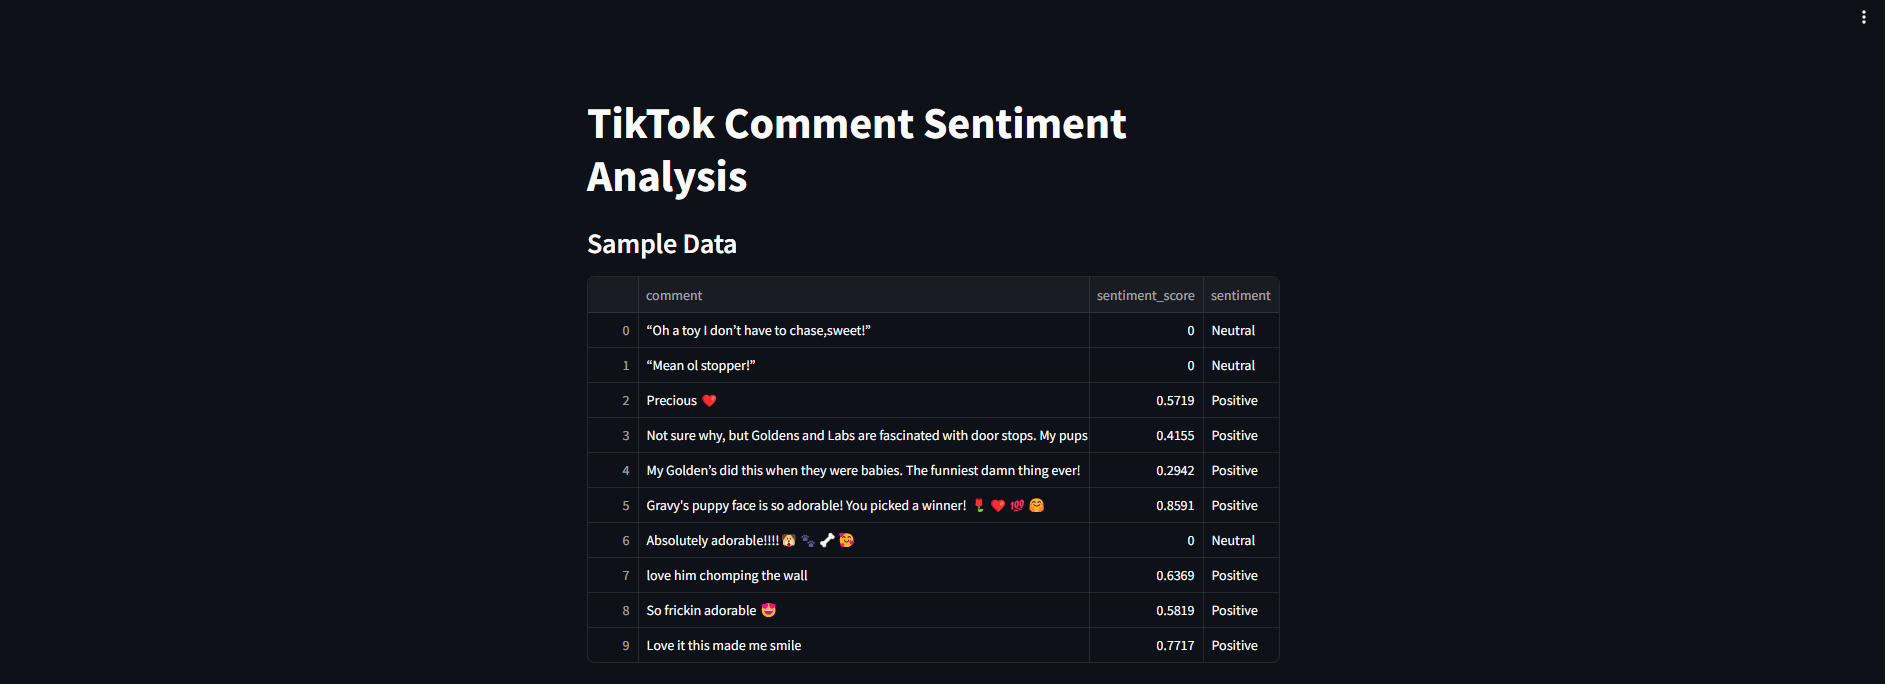

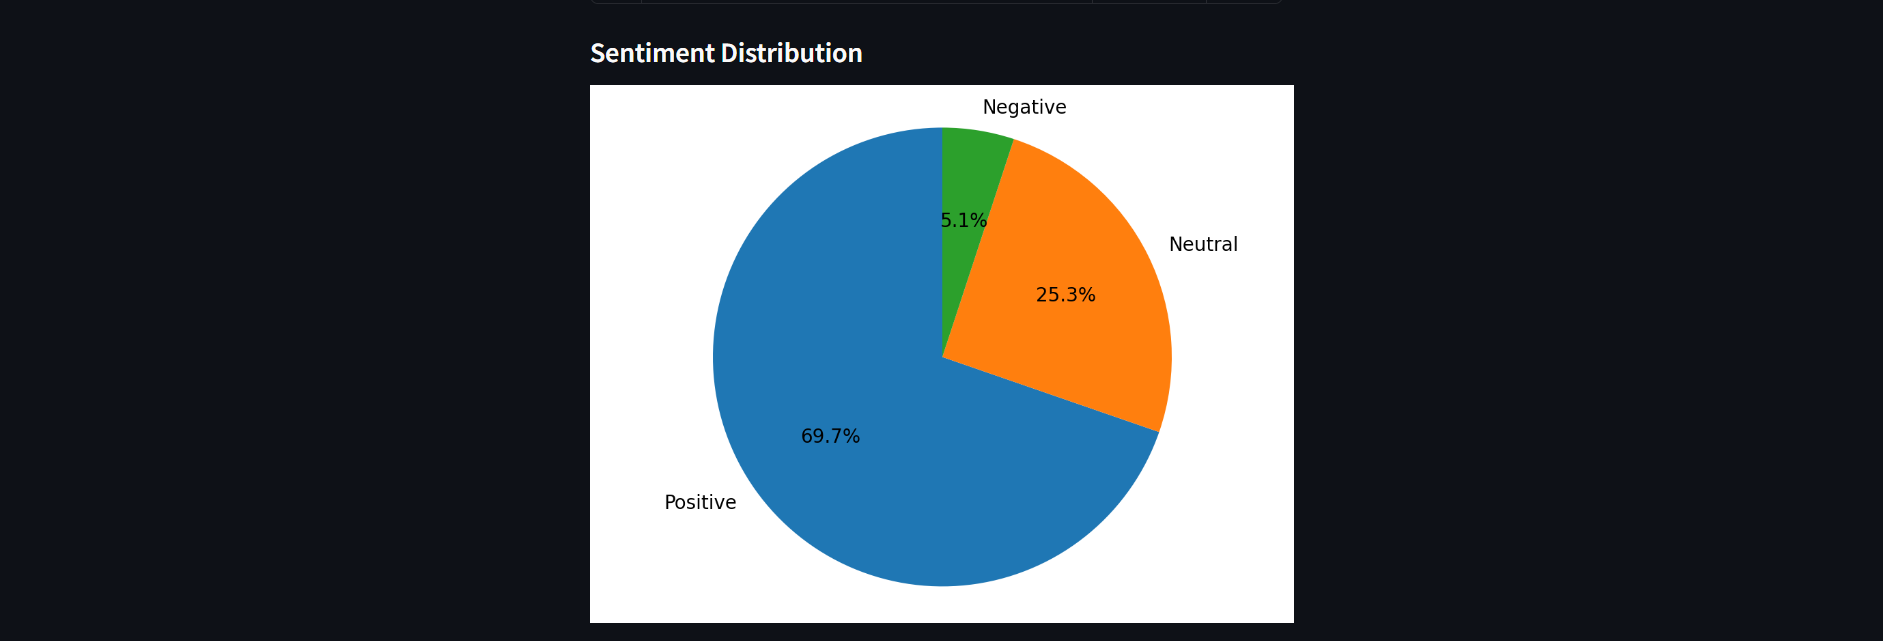

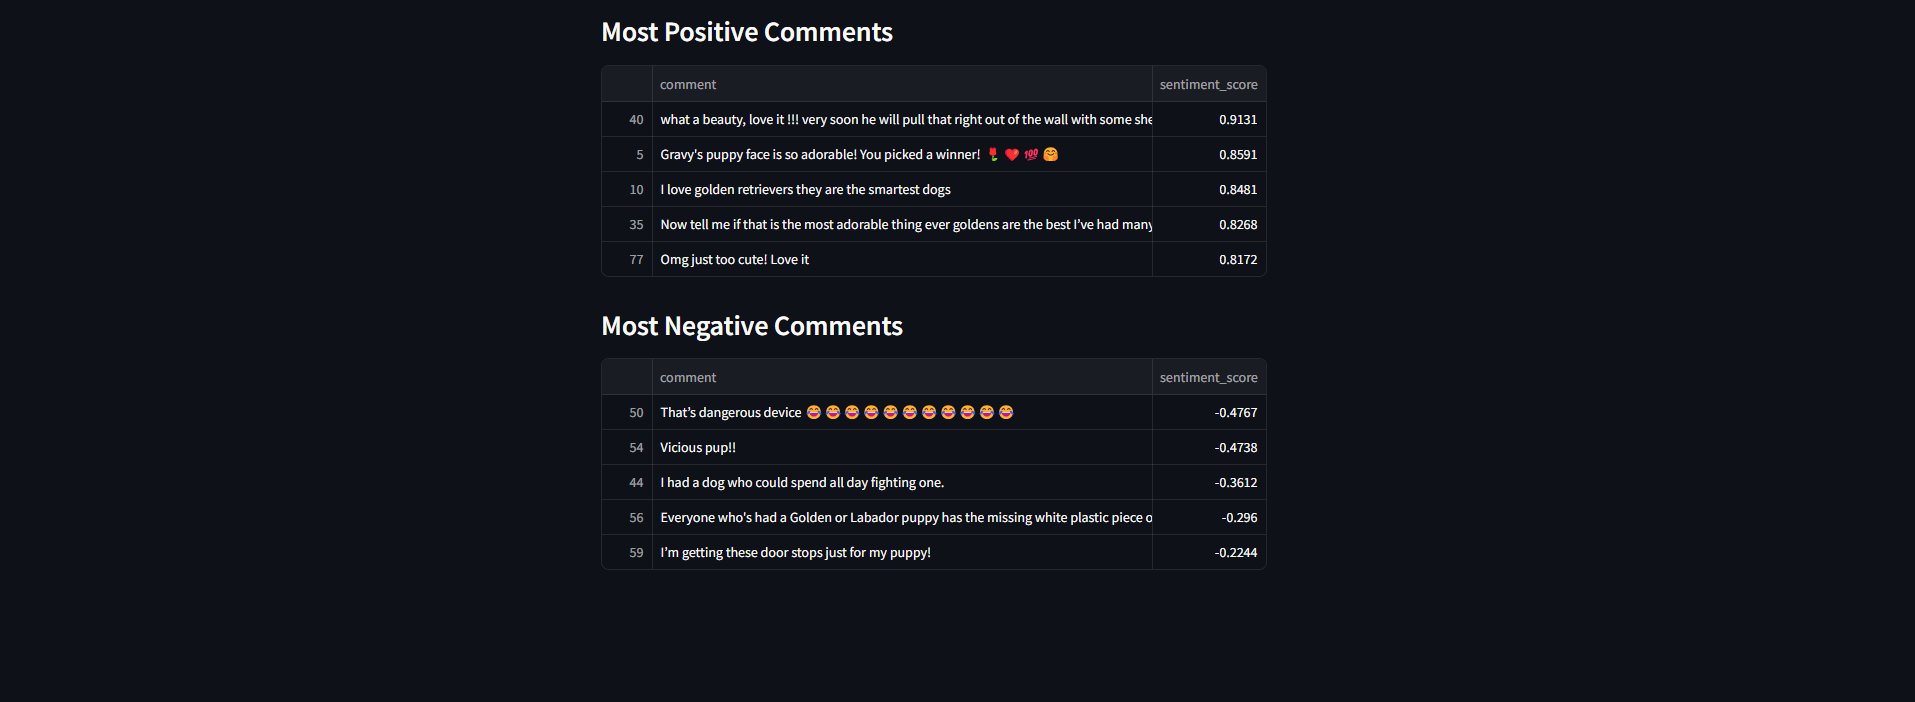

**Using Matplotlib to visualize the sentiment analysis.**

### Sample Data
                                             comment  sentiment_score  \
0            “Oh a toy I don’t have to chase,sweet!”           0.0000   
1                                 “Mean ol stopper!”           0.0000   
2                                        Precious ❤️           0.5719   
3  Not sure why, but Goldens and Labs are fascina...           0.4155   
4  My Golden’s did this when they were babies. Th...           0.2942   
5  Gravy's puppy face is so adorable! You picked ...           0.8591   
6                        Absolutely adorable!!!!🐶🐾🦴🥰           0.0000   
7                         love him chomping the wall           0.6369   
8                              So frickin adorable 😍           0.5819   
9                         Love it this made me smile           0.7717   

  sentiment  
0   Neutral  
1   Neutral  
2  Positive  
3  Positive  
4  Positive  
5  Positive  
6   Neutral  
7  Positive  
8  Positive  
9  Positive  
### Sentiment Distribution

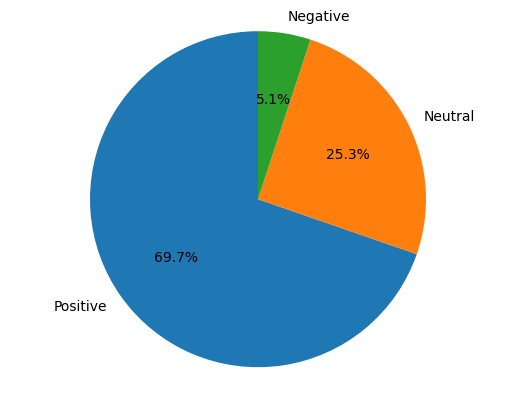

### Most Positive Comments
                                              comment  sentiment_score
40  what a beauty, love it !!! very soon he will p...           0.9131
5   Gravy's puppy face is so adorable! You picked ...           0.8591
10  I love golden retrievers they are the smartest...           0.8481
35  Now tell me if that is the most adorable thing...           0.8268
77                         Omg just too cute! Love it           0.8172
### Most Negative Comments
                                              comment  sentiment_score
50                That’s dangerous device 😂😂😂😂😂😂😂😂😂😂😂          -0.4767
54                                      Vicious pup!!          -0.4738
44  I had a dog who could spend all day fighting one.          -0.3612
56  Everyone who's had a Golden or Labador puppy h...          -0.2960
59    I’m getting these door stops just for my puppy!          -0.2244


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the sentiment data
comments_df = pd.read_csv('comments_with_sentiment.csv')

# Show data
print("### Sample Data")
print(comments_df.head(10))

# Sentiment Distribution
print("### Sentiment Distribution")
sentiment_counts = comments_df['sentiment'].value_counts()
fig, ax = plt.subplots()
ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()

# Display most positive and negative comments
print("### Most Positive Comments")
print(comments_df.nlargest(5, 'sentiment_score')[['comment', 'sentiment_score']])

print("### Most Negative Comments")
print(comments_df.nsmallest(5, 'sentiment_score')[['comment', 'sentiment_score']])
